In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [5]:
df['test group'].value_counts()

,count
test group,
ad,564577
psa,23524


Hypothesis Testing

H0(Null Hypothesis):
 There is no difference between COntrol and Test groups.

H1(Alternative Hypothesis):
 There is a significant difference between groups.

Alpha = 0.05

In [7]:
control = df[df['test group'] == 'psa']['converted']
test = df[df['test group'] == 'ad']['converted']

control.mean(), test.mean()

(np.float64(0.01785410644448223), np.float64(0.025546559636683747))

In [8]:
t_stat, p_value = stats.ttest_ind(control, test)

p_value


np.float64(1.7033052627831264e-13)

In [9]:
if p_value < 0.05:
    print("Statistically Significant Difference ")
else:
    print("No Significant Difference ")


Statistically Significant Difference 


In [10]:
diff_mean = test.mean() - control.mean()

ci = stats.t.interval(
    0.95,
    len(test)-1,
    loc=diff_mean,
    scale=stats.sem(test-control[:len(test)])
)

ci


(np.float64(nan), np.float64(nan))

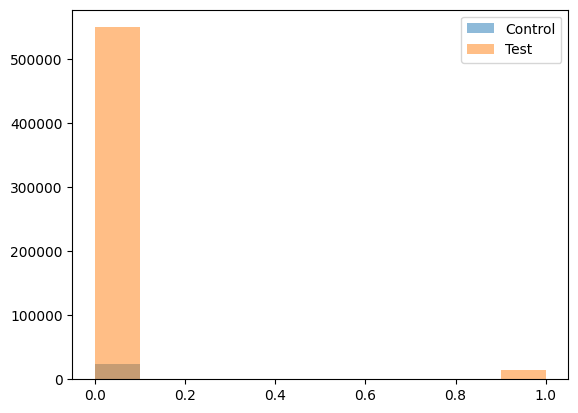

In [12]:
plt.hist(control.astype(int), alpha=0.5, label='Control')
plt.hist(test.astype(int), alpha=0.5, label='Test')
plt.legend()
plt.show()

In [14]:
summary = pd.DataFrame({
    'Group': ['Control', 'Test'],
    'Mean Conversion': [control.mean(), test.mean()]
})

summary.to_csv('ab_test_summary.csv', index=False)


In [17]:
control = df[df['test group'] == 'psa']['converted']
test = df[df['test group'] == 'ad']['converted']

t_stat, p_value = stats.ttest_ind(control, test)

In [18]:
summary = pd.DataFrame({
    'Metric': ['Mean Conversion'],
    'Control Group': [control.mean()],
    'Test Group': [test.mean()],
    'Difference': [test.mean() - control.mean()],
    'P-Value': [p_value],
    'Decision': ['Significant' if p_value < 0.05 else 'Not Significant']
})

summary


,Metric,Control Group,Test Group,Difference,P-Value,Decision
0,Mean Conversion,0.017854,0.025547,0.007692,1.703305e-13,Significant


In [19]:
summary.to_csv('ab_test_summary.csv', index=False)
